线性回归
=====

#### · 线性回归是最基础的机器学习算法
#### · 给定n维输入 $\mathbf{x} = [x_1, x_2,..., x_n]^T$
#### · 对于一个线性回归，需要求一组参数：
#### · $$\mathbf{w} = [w_1, w_2, ..., w_n]^T, b$$
#### · 最后会输出输入与权值的内积+bias：$$y = \langle \mathbf {w, x}\rangle + b$$
#### · 线性回归可以看成是单层神经网络

#### · 对于线性回归，我们需要定义一个损失函数
#### · 这个损失函数包含两个变量，$y$是真实值，而$\hat y$是拟合值
#### · 我们可以通过定义平方损失，即：$$\mathscr {l}(y, \hat y) = \frac{1}{2}(y - \hat y)^2$$

#### · 我们需要通过大量的样本来估计权重向量和bias
#### · 假设存在n个样本，一个样本为： $$\mathbf {x} = [x_1, x_2, ..., x_n]^T$$
#### · n个样本可以被定义为矩阵：$$\mathbf {X} = [\mathbf{x_1}, \mathbf{x_2},..., \mathbf{x_n}]^T \space \mathbf{y} = [y_1, y_2, ..., y_n]^T$$

#### · 训练损失: $$ \begin{aligned}
                \mathscr l (\mathbf {X, y, w},b )&= \frac {1}{2n} \sum_{i = 1}^n(y_i-\langle \mathbf{x_i,w} \rangle - b)^2 \\
                &= \frac{1}{2n} ||\mathbf{y} - \mathbf{Xw}-b||^2
                \end{aligned}$$
#### · 最小化损失来估计参数$\mathbf w, b$ $$\mathbf{w^*,b^*} = arg\min_{\mathbf{w},b} \mathscr{l}(\mathbf{X,y,w},b)$$

#### · 将bias放入权重，即 $\mathbf {X \leftarrow [X,1]}, \mathbf{w \leftarrow}
                      \begin{bmatrix}\mathbf{w}\\ b \\ \end{bmatrix}$
#### · 损失函数被改写为：$$\mathscr{l}(\mathbf {X,y,w}) = \frac{1}{2n}||\mathbf{y-Xw}||^2$$
#### · 我们要求的是$\mathbf{w}$，所以我们要对损失函数中的w求偏导：$$\frac{\partial}{\partial \mathbf{w}}
              \mathscr {l} (\mathbf{X,y,w})=\frac{1}{n}(\mathbf{y - Xw})^T\mathbf{X}$$
#### · 由于损失函数是凸函数，所以说最优解可以表示为：$$\begin{aligned}
            \frac{\partial}{\partial \mathbf{w}}\mathscr {l} (\mathbf{X,y,w}) &= 0\\
              \Leftrightarrow \frac{1}{n}(\mathbf{y - Xw})^T\mathbf{X} &= 0\\
              \Leftrightarrow \mathbf{(y-Xw)^TX}&=0\\
              \Leftrightarrow \mathbf{y^TX-w^TX^TX}&=0\\
              \Leftrightarrow \mathbf{w^*} &= \mathbf{(X^TX)^{-1}X^Ty}
              \end{aligned}$$

# 常见优化算法

#### 1. 梯度下降算法(Gradient Decent)
#### · 思想：梯度是函数值增加最快的方向。以三维空间中的可微凸函数为例，梯度是切平面上的无数向量中，能够使得函数变化最快的方向。而梯度的反方向，也是能让梯度下降的最快方向。
#### · 所以，在一开始给一个随机的初始解$\mathbf{w}$,在每次迭代的过程中减去当前的梯度$
     \frac{\partial {\mathscr{l}}}{\partial{\mathbf{w_{t-1}}}}$乘以一个学习率$\eta$
#### · 可以将某一次迭代标记为$t, t = 1,2,3 ...$。而每一次更新后的梯度可以记为：$$\mathbf{w_t}
        = \mathbf{w_{t-1}}-\eta  \frac{\partial {\mathscr{l}}}{\partial{\mathbf{w_{t-1}}}}$$
#### · 其中，学习率$\eta$是一个超参数，需提前设定，一般为0.1, 0.05 或0.01(不能太大也不能太小)

#### 2. 小批量随机梯度下降（Stochastic Gradient Decent）
#### · 由于在整个训练集上做梯度下降消耗资源太大，所以说，可以随机采样b个样本$i_1,i_2,...,i_b$来近似损失:$$\frac{1}{b}\sum_{i \in \mathbf{I_b}}\mathscr{l}(\mathbf{x_i},y_i,\mathbf{w})$$
#### · 其中，b是批量大小(不能太小：每次计算量太小，不适合并行来最大限度利用资源；也不能太大)

# 线性回归实现

### 从零实现线性回归

#### 从零开始实现，包括数据流水线、模型、损失函数和小批量随机梯度下降优化器

In [2]:
%matplotlib inline
#默认嵌入到notebook里面
import random
import torch
import numpy as np
from torch.utils import data
from d2l import torch as d2l

#### 根据带有噪声的线性模型构造一个人工数据集。使用$\mathbf{w}=[2, -3.4]^T、b = 4.2$和噪声项$\epsilon$生成数据集及其标签：$$y = \mathbf{Xw}+b+\epsilon$$

In [68]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

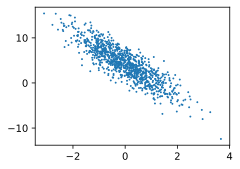

In [71]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),
               labels.detach().numpy(), 1)

#### 定义一个```data_iter```函数，这个函数能够接受批量大小、特征矩阵和标签向量作为输入，生成大小为```batch_size```的小批量

In [21]:
def data_iter(batch_size, features, labels):
    num_examples = len(features) ### 统计样本个数
    indices = list(range(num_examples))### 给每一个样本标号
    random.shuffle(indices)## 随机打乱
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices] ### 生成一个iterator
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0946, -0.4463],
        [-2.2244,  0.5319],
        [ 0.9978,  2.0640],
        [-0.7818, -0.0064],
        [-0.3962, -1.0421],
        [ 1.0634, -1.1341],
        [ 0.8651, -1.0419],
        [ 0.1012,  0.7631],
        [ 0.9746,  0.4734],
        [ 1.4519, -1.1912]]) 
 tensor([[ 4.5142],
        [-2.6700],
        [ 1.1025],
        [ 4.9304],
        [ 8.0901],
        [11.5742],
        [10.8143],
        [ 0.5531],
        [ 4.3927],
        [13.5047]])


#### 定义初始化模型参数

In [48]:
w = torch.normal(0, 0.01, size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#### 定义模型

In [49]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

#### 定义损失函数

In [60]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#### 定义优化算法

In [43]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

#### 训练过程

In [69]:
lr = 0.01
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.000053
epoch2, loss 0.000053
epoch3, loss 0.000053


In [70]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([1.3089e-04, 3.7193e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([4.8161e-05], grad_fn=<RsubBackward1>)


#### 使用PyTorch自带的函数进行线性回归

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [4]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.3065,  0.7478],
         [-0.2021,  1.6236],
         [ 0.4101,  2.1545],
         [ 1.2766, -1.3021],
         [ 1.6827, -0.4113],
         [ 0.3151, -1.1288],
         [-0.1304, -0.1750],
         [ 1.1886,  0.0616],
         [-0.6554,  0.2533],
         [ 0.6216,  0.0324]]),
 tensor([[ 2.2581],
         [-1.7342],
         [-2.2957],
         [11.1898],
         [ 8.9588],
         [ 8.6817],
         [ 4.5427],
         [ 6.3813],
         [ 2.0301],
         [ 5.3399]])]

In [14]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) ### 输入维度是2，输出维度是1

#### 定义一下网络的各种参数

In [15]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

#### 使用均方误差时，调用```MSELoss```类，也成为平方$\mathbf {L_2}$范数

In [16]:
loss = nn.MSELoss()

#### 实例化```SGD```实例

In [17]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

#### 开始训练！

In [18]:
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) ## 计算损失
        trainer.zero_grad() 
        l.backward()
        trainer.step()## 模型进行一次更新
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000292
epoch 2, loss 0.000098
epoch 3, loss 0.000098
epoch 4, loss 0.000097
epoch 5, loss 0.000099
